## <font color='blue'>AutoML em Python</font>
# <font color='blue'>Machine Learning - Processo Manual da Execução Passo a Passo</font>



## Processo Tradicional de Machine Learning - Parte 2 - Modelos de Classificação com Redes Neurais Artificias - Keras + tensorflow

MSE = Mean Square Error(Verificação da taxa de erro de um determinado valor).
The Mean Squared Error (MSE) is perhaps the simplest and most common loss function, often taught in introductory Machine Learning courses. To calculate the MSE, you take the difference between your model's predictions and the ground truth, square it, and average it out across the whole dataset.

## Fonte de Dados

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

## Instalando e Carregando Pacotes

In [1]:
#!pip install -U tensorflow

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


In [3]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q watermark



In [35]:
#!pip install -U keras

In [36]:
#!pip install -U tensorflow

In [9]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [10]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ricardo Roberto de Lima" --iversions

Author: Ricardo Roberto de Lima

sklearn   : 0.0.post1
tensorflow: 2.10.1
seaborn   : 0.11.2
matplotlib: 3.5.2
numpy     : 1.21.5
pandas    : 1.4.4
keras     : 2.12.0



## Carga e Exploração dos Dados

In [11]:
# Carrega os dados
dataset = fetch_california_housing()

In [12]:
# Elementos dos dados
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [13]:
# Converte em dataframe
dados = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [14]:
# Extrai a variável target
target = pd.Series(dataset.target, name = 'MedPrice')

In [15]:
# Shape
dados.shape

(20640, 8)

In [16]:
# Tipos de dados
dados.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [17]:
# Visualiza
dados.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
# Resumo estatístico
pd.options.display.float_format = '{:,.2f}'.format
dados.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,3.87,28.64,5.43,1.10,"1,425.48",3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,"1,132.46",10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,"1,166.00",2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,"1,725.00",3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,"35,682.00","1,243.33",41.95,-114.31


In [19]:
# Verificando valores nulos
dados.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

In [20]:
# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(dados, target, test_size = 0.2, random_state = 42)

In [21]:
# Shape
print("Shape Atributos em Treino: {}".format(X_treino.shape))
print("Shape Target em Treino: {}".format(y_treino.shape))
print("Shape Atributos em Teste: {}".format(X_teste.shape))
print("Shape Target em Teste: {}".format(y_teste.shape))

Shape Atributos em Treino: (16512, 8)
Shape Target em Treino: (16512,)
Shape Atributos em Teste: (4128, 8)
Shape Target em Teste: (4128,)


## Pré-Processameto dos Dados

In [22]:
# Função para padronizar os dados
def padroniza_dados(x, mean, std):
    return (x - mean) / std

In [23]:
# Calcula média e desvio padrão nos dados de entrada em treino
mean = X_treino.mean(axis = 0)
std = X_treino.std(axis = 0)

> Aplicamos a padronização somente aos dados de entrada em treino e teste

In [24]:
# Padroniza os dados
dados_treino_pad = padroniza_dados(X_treino, mean, std)
dados_teste_pad = padroniza_dados(X_teste, mean, std)

In [25]:
# Seed
tf.random.set_seed(42)

## Modelagem 1

In [26]:
# Modelo
#Criando rede neural sequencial. Cada camada(3 no total) abaixo possui 64 neurônios. 'relu' é um método.
modelo = keras.Sequential([layers.Dense(64, activation = 'relu', input_shape = [8]),
                           layers.Dense(64, activation = 'relu'),
                           layers.Dense(1)])

In [27]:
# Sumário
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Criamos o otimizador com taxa de aprendizado de 0.01
optimizer = tf.keras.optimizers.RMSprop(0.01)

In [29]:
# Compilamos o modelo. Loss são as perdas, são como as taxas de erro. Ele vai diminuindo a cada minuto que a rede neural aprende.
#optimizer = será a metodologia a ser usada para ajustar os parêmtros internos
#loss = 'termômetro'. Ele vai tentando encontrar valores com a menor taxa de erro possível.
#metrics = Só para saber se está bom ou ruim. Mostra a acurácia.
modelo.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae', 'mse'])

In [30]:
# Treinamento
history = modelo.fit(dados_treino_pad, 
                     y_treino,
                     validation_split = 0.2,
                     epochs = 300, 
                     batch_size = 1024, 
                     verbose = 1)

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/13 [=>............................] - ETA: 7s - loss: 5.9440 - mae: 2.1515 - mse: 5.9440WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000023008B245E0> and will run it as-is.
Please report this to the TensorFlow team. When filing the

13/13 [==============================] - 0s 3ms/step - loss: 0.3180 - mae: 0.3910 - mse: 0.3180 - val_loss: 0.3287 - val_mae: 0.3828 - val_mse: 0.3287
Epoch 39/300
13/13 [==============================] - 0s 3ms/step - loss: 0.3011 - mae: 0.3764 - mse: 0.3011 - val_loss: 0.3681 - val_mae: 0.4446 - val_mse: 0.3681
Epoch 40/300
13/13 [==============================] - 0s 3ms/step - loss: 0.3073 - mae: 0.3878 - mse: 0.3073 - val_loss: 0.3555 - val_mae: 0.3932 - val_mse: 0.3555
Epoch 41/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2866 - mae: 0.3682 - mse: 0.2866 - val_loss: 0.4946 - val_mae: 0.5453 - val_mse: 0.4946
Epoch 42/300
13/13 [==============================] - 0s 3ms/step - loss: 0.3367 - mae: 0.4052 - mse: 0.3367 - val_loss: 0.3374 - val_mae: 0.3810 - val_mse: 0.3374
Epoch 43/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2925 - mae: 0.3737 - mse: 0.2925 - val_loss: 0.3742 - val_mae: 0.4290 - val_mse: 0.3742
Epoch 44/300
13/13 [=========

13/13 [==============================] - 0s 3ms/step - loss: 0.2567 - mae: 0.3519 - mse: 0.2567 - val_loss: 0.3352 - val_mae: 0.4166 - val_mse: 0.3352
Epoch 89/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2399 - mae: 0.3400 - mse: 0.2399 - val_loss: 0.3171 - val_mae: 0.3747 - val_mse: 0.3171
Epoch 90/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2544 - mae: 0.3507 - mse: 0.2544 - val_loss: 0.3200 - val_mae: 0.4050 - val_mse: 0.3200
Epoch 91/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2569 - mae: 0.3539 - mse: 0.2569 - val_loss: 0.3112 - val_mae: 0.3625 - val_mse: 0.3112
Epoch 92/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2514 - mae: 0.3469 - mse: 0.2514 - val_loss: 0.3321 - val_mae: 0.4135 - val_mse: 0.3321
Epoch 93/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2619 - mae: 0.3573 - mse: 0.2619 - val_loss: 0.3010 - val_mae: 0.3831 - val_mse: 0.3010
Epoch 94/300
13/13 [=========

Epoch 138/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2201 - mae: 0.3276 - mse: 0.2201 - val_loss: 0.3368 - val_mae: 0.3824 - val_mse: 0.3368
Epoch 139/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2310 - mae: 0.3355 - mse: 0.2310 - val_loss: 0.2884 - val_mae: 0.3665 - val_mse: 0.2884
Epoch 140/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2278 - mae: 0.3322 - mse: 0.2278 - val_loss: 0.2958 - val_mae: 0.3636 - val_mse: 0.2958
Epoch 141/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2304 - mae: 0.3336 - mse: 0.2304 - val_loss: 0.3261 - val_mae: 0.3766 - val_mse: 0.3261
Epoch 142/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2165 - mae: 0.3228 - mse: 0.2165 - val_loss: 0.3295 - val_mae: 0.4073 - val_mse: 0.3295
Epoch 143/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2302 - mae: 0.3363 - mse: 0.2302 - val_loss: 0.3027 - val_mae: 0.3593 - val_mse: 0.3027
Epoch 144/

Epoch 188/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2030 - mae: 0.3140 - mse: 0.2030 - val_loss: 0.3172 - val_mae: 0.3960 - val_mse: 0.3172
Epoch 189/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2055 - mae: 0.3177 - mse: 0.2055 - val_loss: 0.3000 - val_mae: 0.3750 - val_mse: 0.3000
Epoch 190/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2126 - mae: 0.3228 - mse: 0.2126 - val_loss: 0.3112 - val_mae: 0.3682 - val_mse: 0.3112
Epoch 191/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2086 - mae: 0.3198 - mse: 0.2086 - val_loss: 0.2932 - val_mae: 0.3724 - val_mse: 0.2932
Epoch 192/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2117 - mae: 0.3233 - mse: 0.2117 - val_loss: 0.3007 - val_mae: 0.3575 - val_mse: 0.3007
Epoch 193/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2041 - mae: 0.3151 - mse: 0.2041 - val_loss: 0.2949 - val_mae: 0.3708 - val_mse: 0.2949
Epoch 194/

Epoch 238/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1969 - mae: 0.3113 - mse: 0.1969 - val_loss: 0.3085 - val_mae: 0.3893 - val_mse: 0.3085
Epoch 239/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1880 - mae: 0.3021 - mse: 0.1880 - val_loss: 0.3041 - val_mae: 0.3610 - val_mse: 0.3041
Epoch 240/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1924 - mae: 0.3058 - mse: 0.1924 - val_loss: 0.3216 - val_mae: 0.4045 - val_mse: 0.3216
Epoch 241/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1949 - mae: 0.3100 - mse: 0.1949 - val_loss: 0.2967 - val_mae: 0.3709 - val_mse: 0.2967
Epoch 242/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1999 - mae: 0.3144 - mse: 0.1999 - val_loss: 0.2924 - val_mae: 0.3567 - val_mse: 0.2924
Epoch 243/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1940 - mae: 0.3097 - mse: 0.1940 - val_loss: 0.2992 - val_mae: 0.3766 - val_mse: 0.2992
Epoch 244/

Epoch 288/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1918 - mae: 0.3095 - mse: 0.1918 - val_loss: 0.3101 - val_mae: 0.3812 - val_mse: 0.3101
Epoch 289/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1821 - mae: 0.3014 - mse: 0.1821 - val_loss: 0.3555 - val_mae: 0.3868 - val_mse: 0.3555
Epoch 290/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1750 - mae: 0.2915 - mse: 0.1750 - val_loss: 0.2995 - val_mae: 0.3640 - val_mse: 0.2995
Epoch 291/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1957 - mae: 0.3132 - mse: 0.1957 - val_loss: 0.3129 - val_mae: 0.3636 - val_mse: 0.3129
Epoch 292/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1822 - mae: 0.3002 - mse: 0.1822 - val_loss: 0.2995 - val_mae: 0.3782 - val_mse: 0.2995
Epoch 293/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1845 - mae: 0.3026 - mse: 0.1845 - val_loss: 0.3174 - val_mae: 0.3684 - val_mse: 0.3174
Epoch 294/

## Avaliação do Modelo 1

In [37]:
# Avaliação
loss, mae, mse = modelo.evaluate(dados_teste_pad, y_teste, verbose = 0)

In [38]:
print(mse)

0.2987377643585205


In [39]:
# Converte o histórico de treinamento em dataframe
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

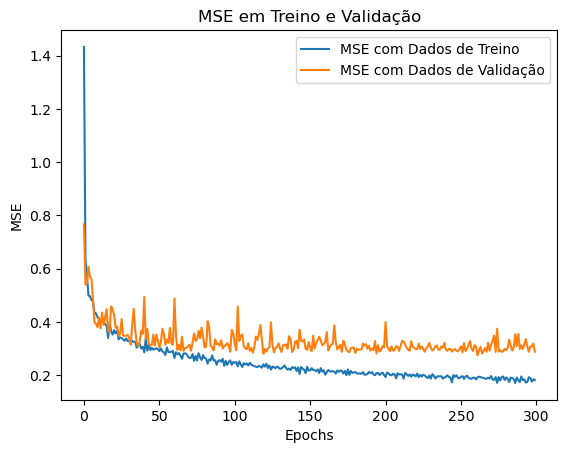

In [40]:
# Plot
plt.plot(hist['epoch'], hist['mse'], label = "MSE com Dados de Treino")
plt.plot(hist['epoch'], hist['val_mse'], label = "MSE com Dados de Validação")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE em Treino e Validação')
plt.legend()
plt.show()

## Modelagem 2

In [41]:
# Vamos treinar o modelo em menos épocas
optimizer = tf.keras.optimizers.RMSprop(0.001)
modelo.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae', 'mse'])
history = modelo.fit(dados_treino_pad, 
                     y_treino, 
                     validation_split = 0.2, 
                     epochs = 150, 
                     batch_size = 1024, 
                     verbose = 1)

Epoch 1/150
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/13 [=>............................] - ETA: 4s - loss: 0.1473 - mae: 0.2613 - mse: 0.1473WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000023009EB88B0> and will run it as-is.
Please report this to the TensorFlow team. When filing the

13/13 [==============================] - 0s 3ms/step - loss: 0.1395 - mae: 0.2576 - mse: 0.1395 - val_loss: 0.2866 - val_mae: 0.3565 - val_mse: 0.2866
Epoch 39/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1395 - mae: 0.2573 - mse: 0.1395 - val_loss: 0.2882 - val_mae: 0.3587 - val_mse: 0.2882
Epoch 40/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1393 - mae: 0.2575 - mse: 0.1393 - val_loss: 0.2860 - val_mae: 0.3569 - val_mse: 0.2860
Epoch 41/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1396 - mae: 0.2576 - mse: 0.1396 - val_loss: 0.2878 - val_mae: 0.3585 - val_mse: 0.2878
Epoch 42/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1393 - mae: 0.2574 - mse: 0.1393 - val_loss: 0.2863 - val_mae: 0.3563 - val_mse: 0.2863
Epoch 43/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1392 - mae: 0.2573 - mse: 0.1392 - val_loss: 0.2863 - val_mae: 0.3565 - val_mse: 0.2863
Epoch 44/150
13/13 [=========

13/13 [==============================] - 0s 3ms/step - loss: 0.1361 - mae: 0.2547 - mse: 0.1361 - val_loss: 0.2903 - val_mae: 0.3599 - val_mse: 0.2903
Epoch 89/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1363 - mae: 0.2547 - mse: 0.1363 - val_loss: 0.2921 - val_mae: 0.3617 - val_mse: 0.2921
Epoch 90/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1359 - mae: 0.2545 - mse: 0.1359 - val_loss: 0.2903 - val_mae: 0.3595 - val_mse: 0.2903
Epoch 91/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1360 - mae: 0.2546 - mse: 0.1360 - val_loss: 0.2919 - val_mae: 0.3615 - val_mse: 0.2919
Epoch 92/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1357 - mae: 0.2546 - mse: 0.1357 - val_loss: 0.2926 - val_mae: 0.3607 - val_mse: 0.2926
Epoch 93/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1359 - mae: 0.2542 - mse: 0.1359 - val_loss: 0.2904 - val_mae: 0.3583 - val_mse: 0.2904
Epoch 94/150
13/13 [=========

Epoch 138/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1334 - mae: 0.2524 - mse: 0.1334 - val_loss: 0.2939 - val_mae: 0.3612 - val_mse: 0.2939
Epoch 139/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1338 - mae: 0.2527 - mse: 0.1338 - val_loss: 0.2939 - val_mae: 0.3606 - val_mse: 0.2939
Epoch 140/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1334 - mae: 0.2521 - mse: 0.1334 - val_loss: 0.2957 - val_mae: 0.3616 - val_mse: 0.2957
Epoch 141/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1334 - mae: 0.2524 - mse: 0.1334 - val_loss: 0.2937 - val_mae: 0.3608 - val_mse: 0.2937
Epoch 142/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1333 - mae: 0.2523 - mse: 0.1333 - val_loss: 0.2954 - val_mae: 0.3611 - val_mse: 0.2954
Epoch 143/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1332 - mae: 0.2523 - mse: 0.1332 - val_loss: 0.2944 - val_mae: 0.3612 - val_mse: 0.2944
Epoch 144/

## Avaliação do Modelo 2

In [42]:
# Avalia o modelo
loss, mae, mse = modelo.evaluate(dados_teste_pad, y_teste, verbose = 0)

In [43]:
print(mse)

0.3138793706893921


In [44]:
# Converte o histórico de treinamento em dataframe
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

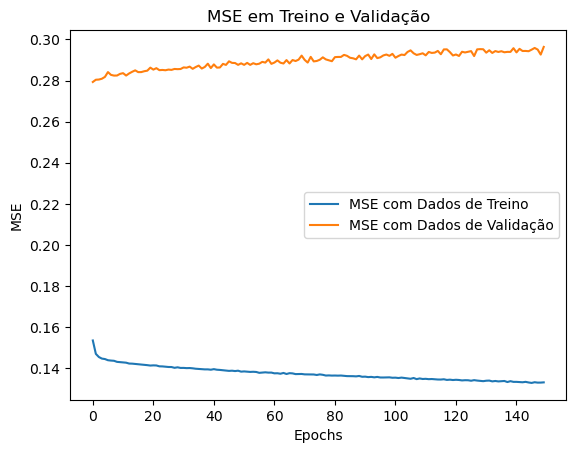

In [45]:
# Plot
plt.plot(hist['epoch'], hist['mse'], label = "MSE com Dados de Treino")
plt.plot(hist['epoch'], hist['val_mse'], label = "MSE com Dados de Validação")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE em Treino e Validação')
plt.legend()
plt.show()

# Finalizar processo